In [108]:
from datetime import date
from nsepy import get_history
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Date'>

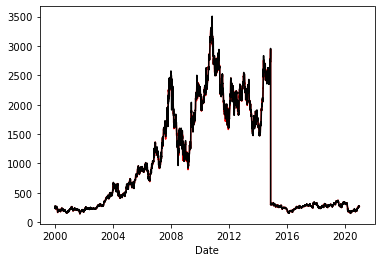

In [109]:
sbin_data=get_history(symbol='SBIN',start=date(2000,1,1),end=date(2020,12,31))
sbin_data['Close'].plot(color='red')
sbin_data['Open'].plot(color='black')

<AxesSubplot:xlabel='Date'>

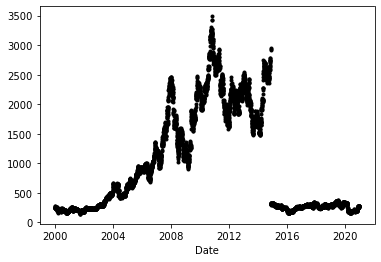

In [110]:
sbin_data['Close'].plot(style='k.')

<AxesSubplot:ylabel='Frequency'>

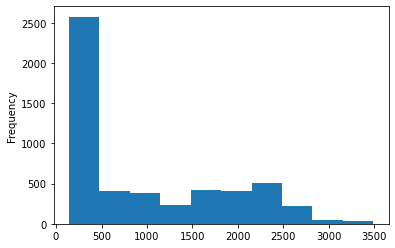

In [111]:
sbin_data['Close'].plot(style='k.',kind='hist')

In [112]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

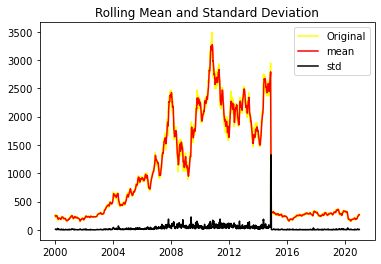

Test Stat                 -1.939137
p-value                    0.313880
no. lags used              3.000000
no.of observations      5225.000000
Critical value (1%)       -3.431602
Critical value (5%)       -2.862093
Critical value (10%)      -2.567065
dtype: float64


In [113]:
def stationarity(data):
    rollmean=data.rolling(12).mean()
    rollstd=data.rolling(12).std()
    plt.plot(data,color='yellow',label='Original')
    plt.plot(rollmean,color='red',label='mean')
    plt.plot(rollstd,color='black',label='std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    adft=adfuller(data,autolag='AIC')
    result=pd.Series(adft[0:4],index=['Test Stat','p-value','no. lags used','no.of observations'])
    for key,value in adft[4].items():
        result['Critical value (%s)' %key]=value
    
    print(result)
    

stationarity(sbin_data['Close'])

<Figure size 432x288 with 0 Axes>

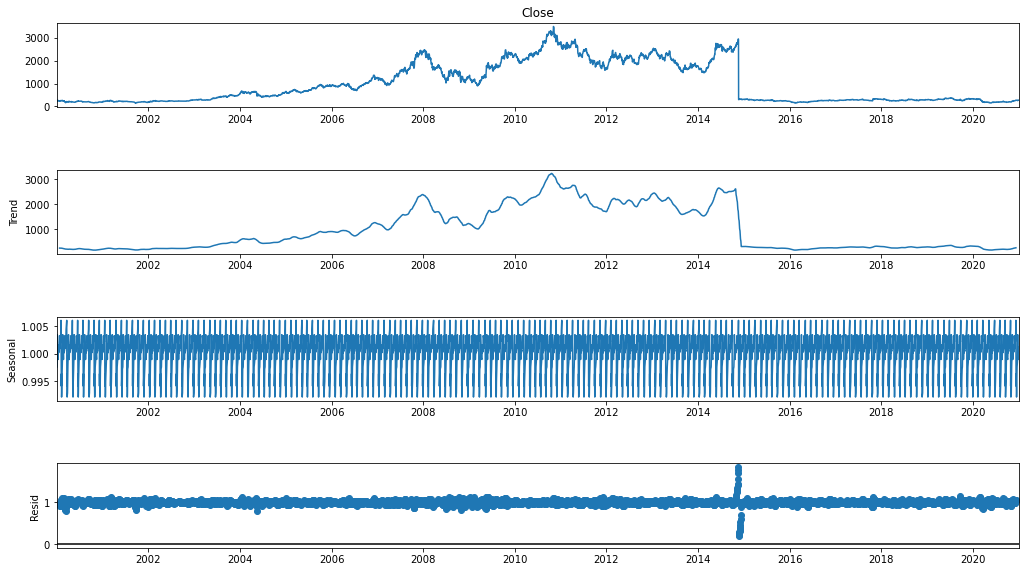

In [114]:
decom=seasonal_decompose(sbin_data['Close'],model='multiplicative',period=30)
fig = plt.figure()  
fig = decom.plot()  
fig.set_size_inches(16, 9)

<AxesSubplot:xlabel='Date'>

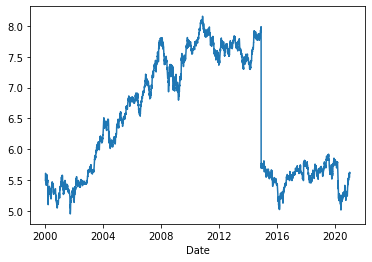

In [115]:
df_log=np.log(sbin_data['Close'])
df_log.plot()

<AxesSubplot:xlabel='Date'>

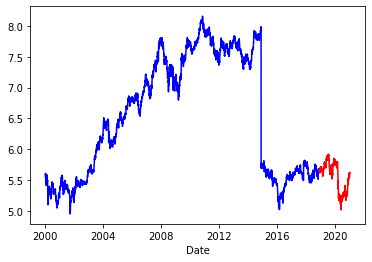

In [116]:
train_data,test_data=df_log[3:int(len(df_log)*0.9)],df_log[int(len(df_log)*0.9):]
train_data.plot(color='blue')
test_data.plot(color='red')

In [117]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import seaborn as sns

In [118]:
model=auto_arima(train_data,start_p=0,start_q=0,
                test='adf',
                max_p=3,
                max_q=3,
                m=1,
                d=None,
                seasonal=False,
                start_P=0,
                D=0,
                trace=True,
                error_action='ignore',
                suppress_warnings=True,
                step_wise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16765.178, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16765.401, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16765.465, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16767.176, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16763.808, Time=0.82 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.987 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4703
Model:               SARIMAX(0, 1, 0)   Log Likelihood                8384.588
Date:                Sun, 08 Jan 2023   AIC                         -16767.176
Time:                        20:29:18   BIC                         -16760.721
Sample:                             0   HQIC                        -16764.907
                               - 4703                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0017   1.05e-06   1574.099      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   2.22   Jarque-Bera (JB):         869245023.34
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               7.16   Skew:                           -37.50
Prob(H) (two-sided):                  0.00   Kurtosis:                      2108.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

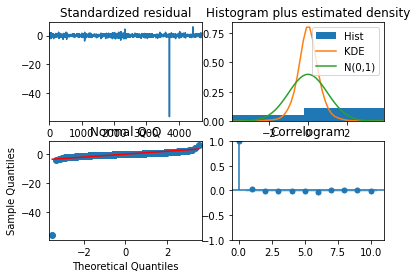

In [119]:
model.plot_diagnostics()
plt.show()

In [121]:
model1 = ARIMA(train_data, order=(3, 1, 2))
fitted = model1.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4703
Model:                 ARIMA(3, 1, 2)   Log Likelihood                8386.582
Date:                Sun, 08 Jan 2023   AIC                         -16761.163
Time:                        20:29:35   BIC                         -16722.429
Sample:                             0   HQIC                        -16747.545
                               - 4703                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0110      4.503      0.002      0.998      -8.814       8.836
ar.L2         -0.0071      2.894     -0.002      0.998      -5.680       5.666
ar.L3         -0.0128      0.123     -0.104      0.917      -0.255       0.229
ma.L1          0.0108      4.503      0.002      0.998      -8.815       8.836
ma.L2         -0.0074      2.814     -0.003      0.998      -5.524       5.509
sigma2         0.0017   2.05e-06    804.426      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         869285770.19
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.19   Skew:                           -37.50
Prob(H) (two-sided):                  0.00   Kurtosis:                      2108.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [152]:
out = fitted.forecast(steps=len(test_data))
fc=list(out)

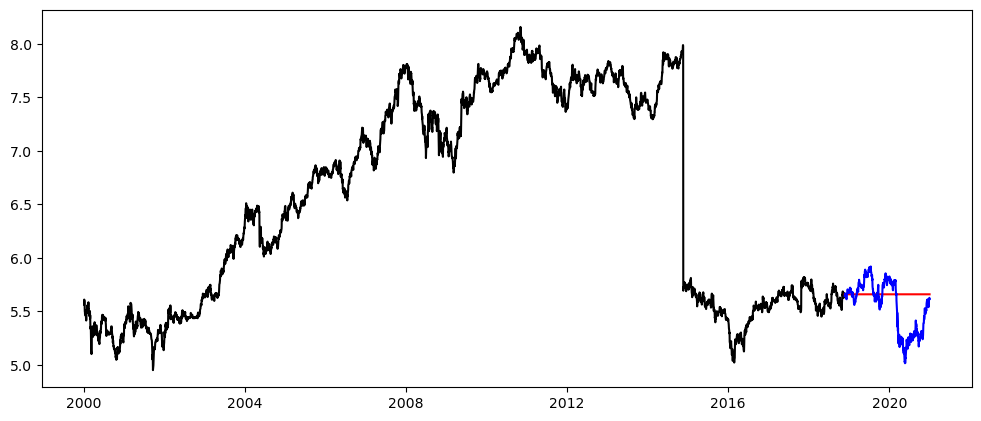

In [153]:
fc_series=pd.Series(fc,index=test_data.index)
# lower_series = pd.Series(conf[:, 0], index=test_data.index)
# upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data,color='black',label='trained data')
plt.plot(fc_series,color='red',label='predicted data')
plt.plot(test_data,color='blue',label='test data')
plt.show()